In [73]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns

from matplotlib import pyplot as plt
from hdbscan import HDBSCAN 

In [74]:
### Faster
time_resolution = 21
time_window = 5

c_path = '../network_data_smoothed'+str(time_resolution+time_window)+'/commits/'
e_path = '../network_data_smoothed'+str(time_resolution+time_window)+'/emails/'
#c_path = './network_data/commits/'

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_freqs = pd.Series(project_names)

project_names = pd.Series(project_names).drop_duplicates().values
project_freqs.describe()

count     6014
unique     259
top       wave
freq        81
dtype: object

In [75]:
df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_social_overlaps = pd.read_csv("../result_csv/social_overlaps_smoothed"+str(time_resolution+time_window)+".csv")
df_tech_edgesize = pd.read_csv("../result_csv/tech_edgesize_smoothed"+str(time_resolution+time_window)+".csv")
df_social_edgesize = pd.read_csv("../result_csv/social_edgesize_smoothed"+str(time_resolution+time_window)+".csv")

all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

all_graduated = [x.lower() for x in all_graduated if x.lower() in df_tech_overlaps.columns and x.lower() in df_social_overlaps.columns]
all_retired = [x.lower() for x in all_retired if x.lower() in df_tech_overlaps.columns and x.lower() in df_social_overlaps.columns]

In [76]:
all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [77]:
df_tech_overlaps.columns

Index(['openwebbeans', 'jena', 'etch', 'shindig', 'sanselan', 'rya',
       'skywalking', 'stdcxx', 'usergrid', 'samza',
       ...
       'reef', 'onami', 'sqoop', 'nutch', 'juice', 'muse', 'beehive', 'ofbiz',
       'directory', 'cmda'],
      dtype='object', length=259)

In [78]:
df_tech_vectors = df_tech_overlaps[:24].replace(-1.0,0.0).values.T

In [79]:
df_tech_vectors.shape

(259, 24)

In [80]:
df_social_vectors = df_social_overlaps[:24].replace(-1.0,0.0).values.T

In [81]:
df_social_vectors.shape

(273, 24)

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_tech = linkage(df_tech_vectors, 'ward')

In [83]:
cluster_tech

array([[2.53000000e+02, 2.57000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.58000000e+02, 2.59000000e+02, 7.29549360e-02, 3.00000000e+00],
       [8.30000000e+01, 2.08000000e+02, 9.04129972e-02, 2.00000000e+00],
       ...,
       [5.05000000e+02, 5.06000000e+02, 5.04112040e+00, 8.90000000e+01],
       [5.12000000e+02, 5.14000000e+02, 6.14259162e+00, 1.83000000e+02],
       [5.13000000e+02, 5.15000000e+02, 9.78894869e+00, 2.59000000e+02]])

In [84]:
def fancy_dendrogram(*args, **kwargs):
	max_d = kwargs.pop('max_d', None)
	if max_d and 'color_threshold' not in kwargs:
		kwargs['color_threshold'] = max_d
	annotate_above = kwargs.pop('annotate_above', 0)

	ddata = dendrogram(*args, **kwargs)

	if not kwargs.get('no_plot', False):
		plt.title('Hierarchical Clustering Dendrogram (truncated)')
		plt.xlabel('sample index or (cluster size)')
		plt.ylabel('distance')
		for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			if y > annotate_above:
				plt.plot(x, y, 'o', c=c)
				plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
		if max_d:
			plt.axhline(y=max_d, c='k')
	return ddata

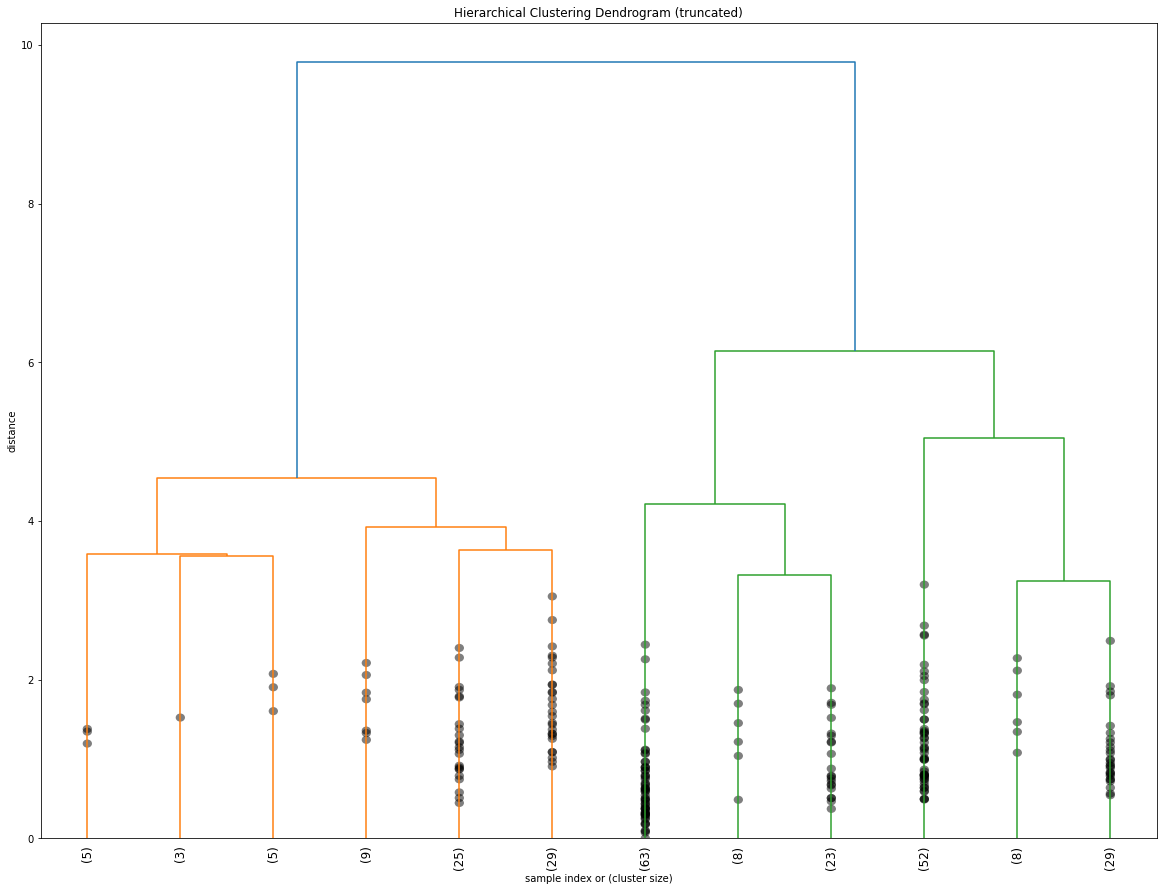

In [85]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_tech, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_tech, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_social = linkage(df_social_vectors, 'ward')

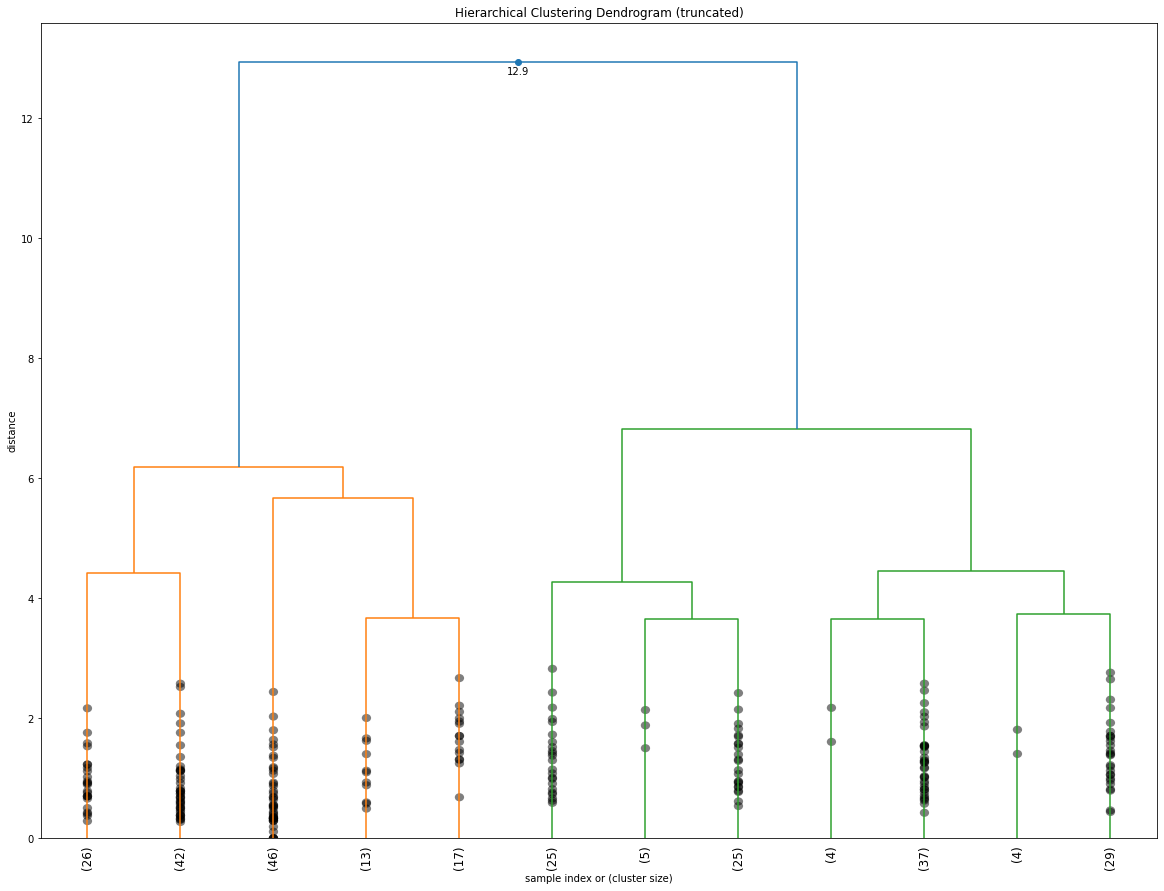

In [87]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_social, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_social, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [88]:
from scipy.cluster.hierarchy import fcluster
k = 4
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_tech = fcluster(cluster_tech, k, criterion='distance')
print(clusters_result_tech)

[6 5 4 2 4 4 5 2 2 2 2 6 5 5 2 1 2 6 3 2 2 2 6 2 1 2 2 5 5 2 2 5 2 1 4 5 2
 5 3 5 5 2 3 5 3 2 5 5 3 6 5 5 1 4 3 6 3 5 5 2 2 4 5 2 3 2 2 2 2 2 1 5 6 2
 3 2 1 2 4 1 1 2 6 3 3 5 6 1 6 2 2 2 6 2 2 6 1 2 4 2 3 3 5 3 3 5 2 4 2 2 5
 6 4 6 5 6 3 2 2 1 5 2 5 2 5 5 3 2 2 2 3 3 5 3 6 6 2 3 5 6 3 6 2 2 6 4 6 5
 4 6 6 5 2 4 5 5 4 6 4 6 5 3 3 3 2 5 3 2 2 2 5 2 2 4 6 6 5 4 5 6 2 3 3 5 2
 2 3 4 6 5 5 4 1 4 5 6 4 3 3 4 1 3 3 3 6 5 4 2 3 5 6 3 5 3 3 3 3 6 3 2 6 3
 3 6 6 6 3 5 4 5 5 3 5 3 3 4 4 5 4 3 4 3 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3]


In [89]:
from scipy.cluster.hierarchy import fcluster
k = 4.7
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_social = fcluster(cluster_social, k, criterion='distance')
print(clusters_result_social)

[4 1 4 3 5 3 1 5 4 5 5 4 4 3 4 4 2 5 5 1 2 4 1 5 5 3 4 5 3 5 3 3 2 1 3 2 5
 5 4 2 4 3 5 5 3 5 5 2 4 3 5 4 3 1 4 5 5 5 4 4 5 4 1 4 5 1 3 3 5 1 5 1 5 5
 5 4 5 5 3 4 5 5 4 5 5 4 3 3 4 5 3 5 1 1 2 5 5 2 4 2 4 1 5 2 1 1 5 3 4 4 1
 5 5 5 4 5 3 1 3 2 5 4 1 3 1 3 2 5 4 1 5 5 4 2 1 5 5 2 5 5 5 3 5 1 2 4 2 1
 4 4 1 1 1 1 1 5 4 1 1 4 4 1 4 2 4 5 1 2 4 4 4 4 1 4 4 1 1 2 5 5 1 1 1 5 4
 1 5 5 5 3 5 5 5 3 1 1 1 5 2 1 4 3 1 5 2 1 3 5 1 1 5 5 1 4 1 1 2 2 2 1 1 2
 2 2 4 5 5 1 1 5 1 2 2 1 1 2 5 2 5 3 4 3 1 1 2 4 2 2 1 1 2 1 4 4 2 4 1 4 1
 1 1 2 2 2 2 1 2 1 2 2 2 2 2]


In [90]:
df_tech_results = pd.DataFrame(np.c_[df_tech_vectors,clusters_result_tech])
df_tech_results.index = df_tech_overlaps.columns
df_tech_results = df_tech_results.rename(columns={24:'cluster'})

In [91]:
df_tech_results

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster
openwebbeans,0.785714,0.692982,0.558824,0.360294,0.165138,0.127907,0.500000,0.367816,0.313953,0.395349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,6.0
jena,0.000000,0.000000,0.000000,0.266667,0.386364,0.403409,0.287081,0.239234,0.225225,0.171329,...,0.402062,0.095420,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.0
etch,0.000000,1.000000,0.479508,0.062893,0.285714,0.000000,0.031250,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.0
shindig,0.269231,0.555556,0.277778,0.333333,0.510753,0.326667,0.349624,0.315789,0.280000,0.262260,...,0.215730,0.284635,0.215517,0.152866,0.217143,0.18705,0.251799,0.285714,0.098901,2.0
sanselan,1.000000,0.769231,0.589744,0.615385,0.000000,0.000000,0.000000,0.000000,0.500000,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
muse,0.000000,0.529412,0.320000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.0
beehive,0.388112,0.255245,0.380117,0.472678,0.337900,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.0
ofbiz,0.257143,0.164286,0.451087,0.138365,0.119497,0.125604,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.0
directory,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.0


In [92]:
df_tech_plot = pd.DataFrame

In [93]:
df_tech_plot = df_tech_results.groupby('cluster').agg('median')

<AxesSubplot:>

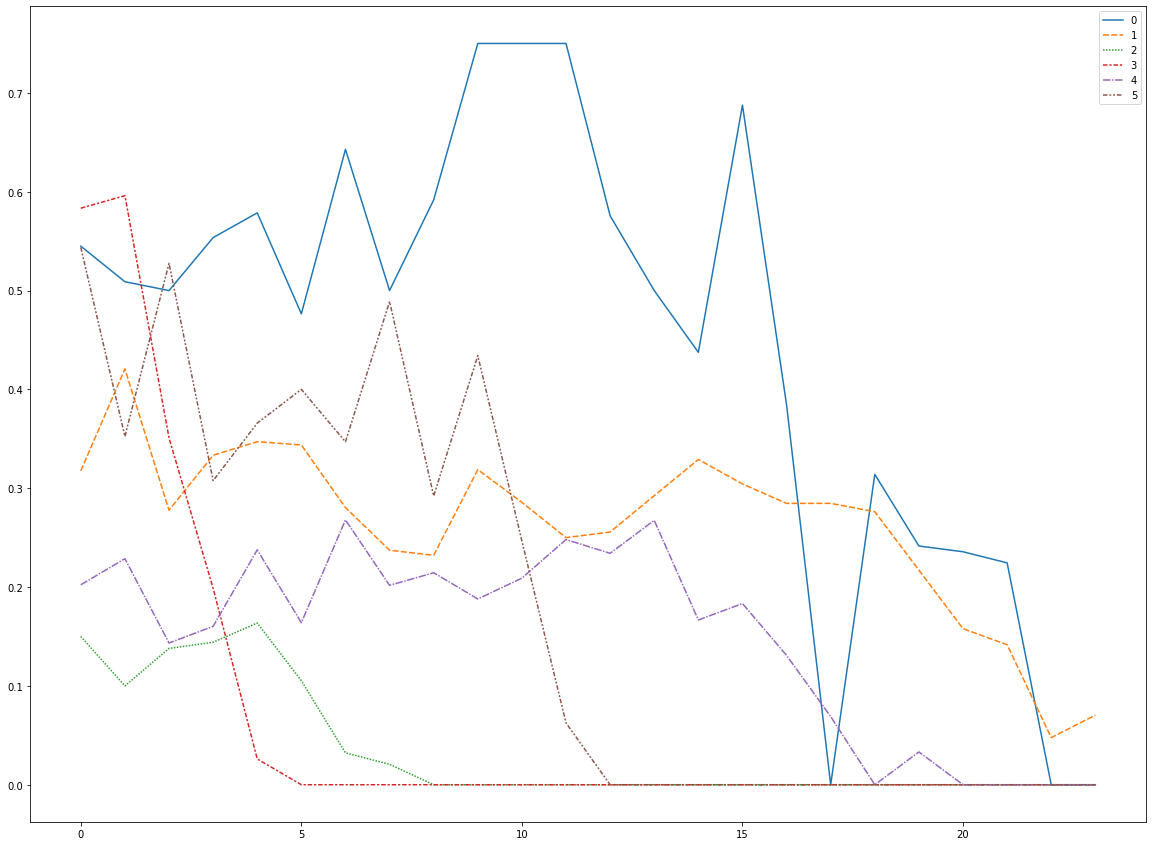

In [94]:
plt.figure(figsize=(20, 15))
sns.lineplot(data= df_tech_plot.values.T)

In [95]:
df_social_results = pd.DataFrame(np.c_[df_social_vectors,clusters_result_social])
df_social_results.index = df_social_overlaps.columns
df_social_results = df_social_results.rename(columns={24:'cluster'})
df_social_plot = df_social_results.groupby('cluster').agg('median')

<AxesSubplot:>

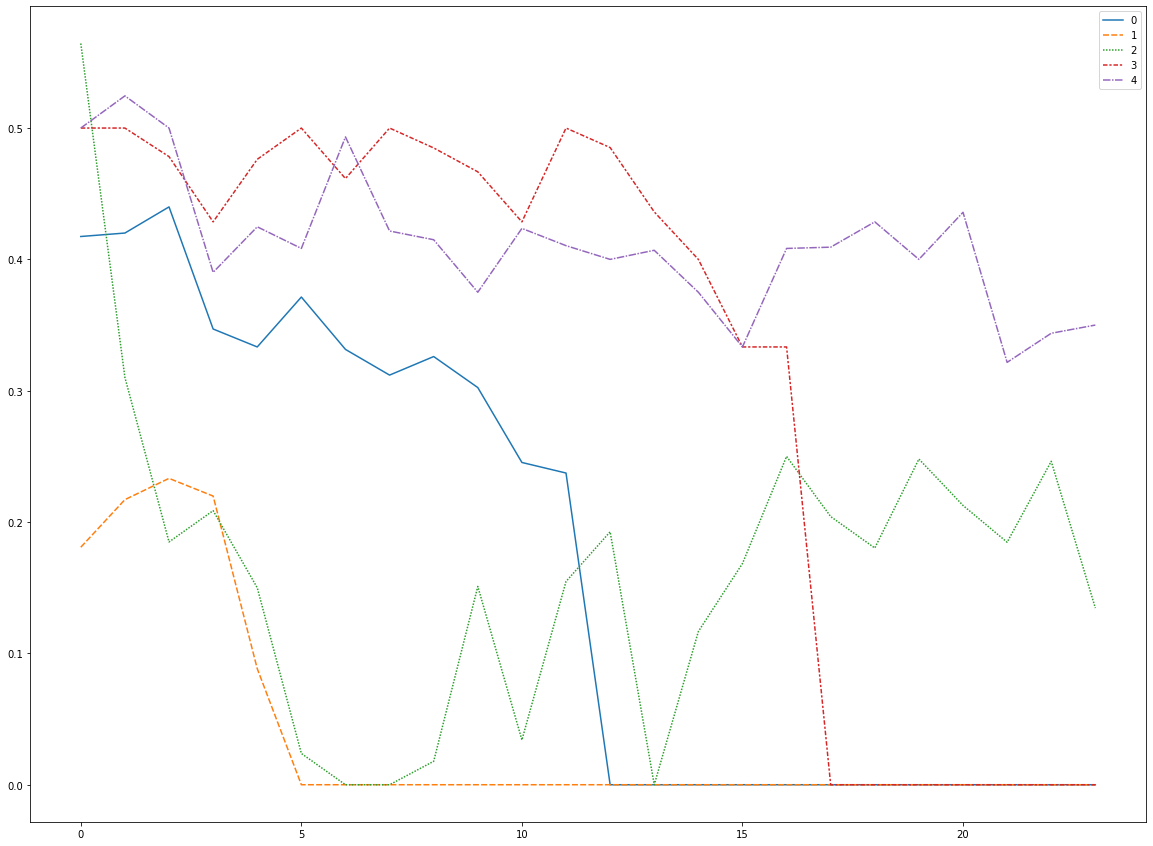

In [96]:
plt.figure(figsize=(20, 15))
sns.lineplot(data= df_social_plot.values.T)

In [107]:
clusterer = HDBSCAN(algorithm= 'best', approx_min_span_tree=True, gen_min_span_tree=True, metric='cityblock',  min_cluster_size= 4).fit(df_social_vectors)

In [108]:
clusterer.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1